# **K-means - isotropic data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

(300, 2) 
 (240, 2) (60, 2) 



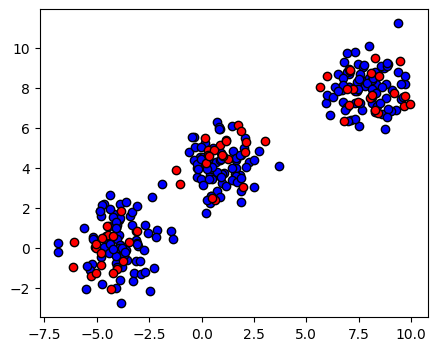

In [ ]:
# Generate data
X, _ = make_blobs(n_samples = 300 , n_features = 2, random_state = 3)

# Create train / test splits
X_train, X_test = train_test_split(X,test_size=0.2, random_state=3)

# Plot everything and print all shapes
_,ax =plt.subplots(figsize=(5,4))
ax.scatter( X_train[:,0] , X_train[:,1], c = 'b' , edgecolors='k')
ax.scatter( X_test[:,0], X_test[:,1] , c = 'r' , edgecolors='k')

#"/n" esto es salto de linea
print (X.shape, "\n", X_train.shape, X_test.shape, "\n")

## **Elbow method**

In [ ]:
# Create a distance function
def euclidean_distance(pt1, pt2):
  assert len(pt1) == 2, "Error! No 2d point"
  assert len(pt2) == 2, "Error! No 2d point"
  return (pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2

In [ ]:
# Define num of clusters
clusters = [ 2,3,4,5,6,7,8,9,10 ]
elbow_distances = []

# Eval kmeans over each num of clusters
for k in clusters :
  kmeans = KMeans(n_clusters = k )
  kmeans.fit( X_train )

  centroides = kmeans.cluster_centers_
  predictions = kmeans.predict( X_test )
  distance = 0

  for i in range(0, len(X_test)) :
    centroide = centroides[predictions[i]]
    distance += euclidean_distance( centroide , X_test[i] )

  elbow_distances.append(distance/len(X_test))

print (len(elbow_distances),len(clusters))

9 9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0.5, 1.0, 'Elbow')

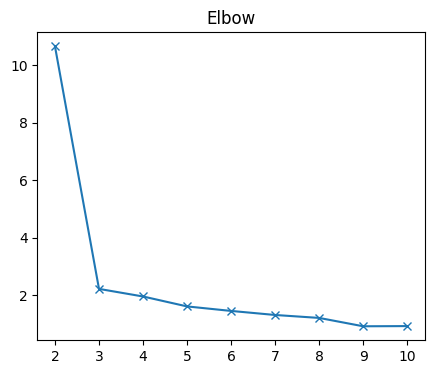

In [ ]:
# Plot the elbow
_, ax = plt.subplots (figsize = (5,4))
ax.plot( clusters , elbow_distances , marker="x")
ax.set_title("Elbow")

## **Silhouette method**

In [ ]:
from sklearn.metrics import silhouette_score

# Define num of clusters
clusters = [ 2,3,4,5,6,7,8,9,10 ]
silhouette_distances = []

# Eval kmeans over each num of clusters
for k in clusters :
  kmeans = KMeans(n_clusters = k )
  kmeans.fit( X_train )

  predictions = kmeans.predict( X_test )
  distance = silhouette_score( X_test , predictions , metric="euclidean")

  silhouette_distances.append(distance)

print (len(silhouette_distances),len(clusters))

9 9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0.5, 1.0, 'Silhouette')

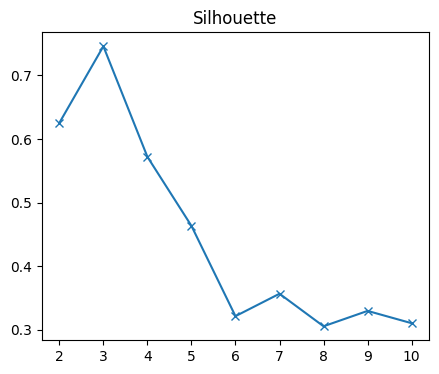

In [ ]:
# Plot the silhouette
_, ax = plt.subplots (figsize = (5,4))
ax.plot( clusters , silhouette_distances, marker="x")
ax.set_title("Silhouette")

# **K-Means - Real data**

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/machine_learning/Tools/fruits_data_ext.csv')

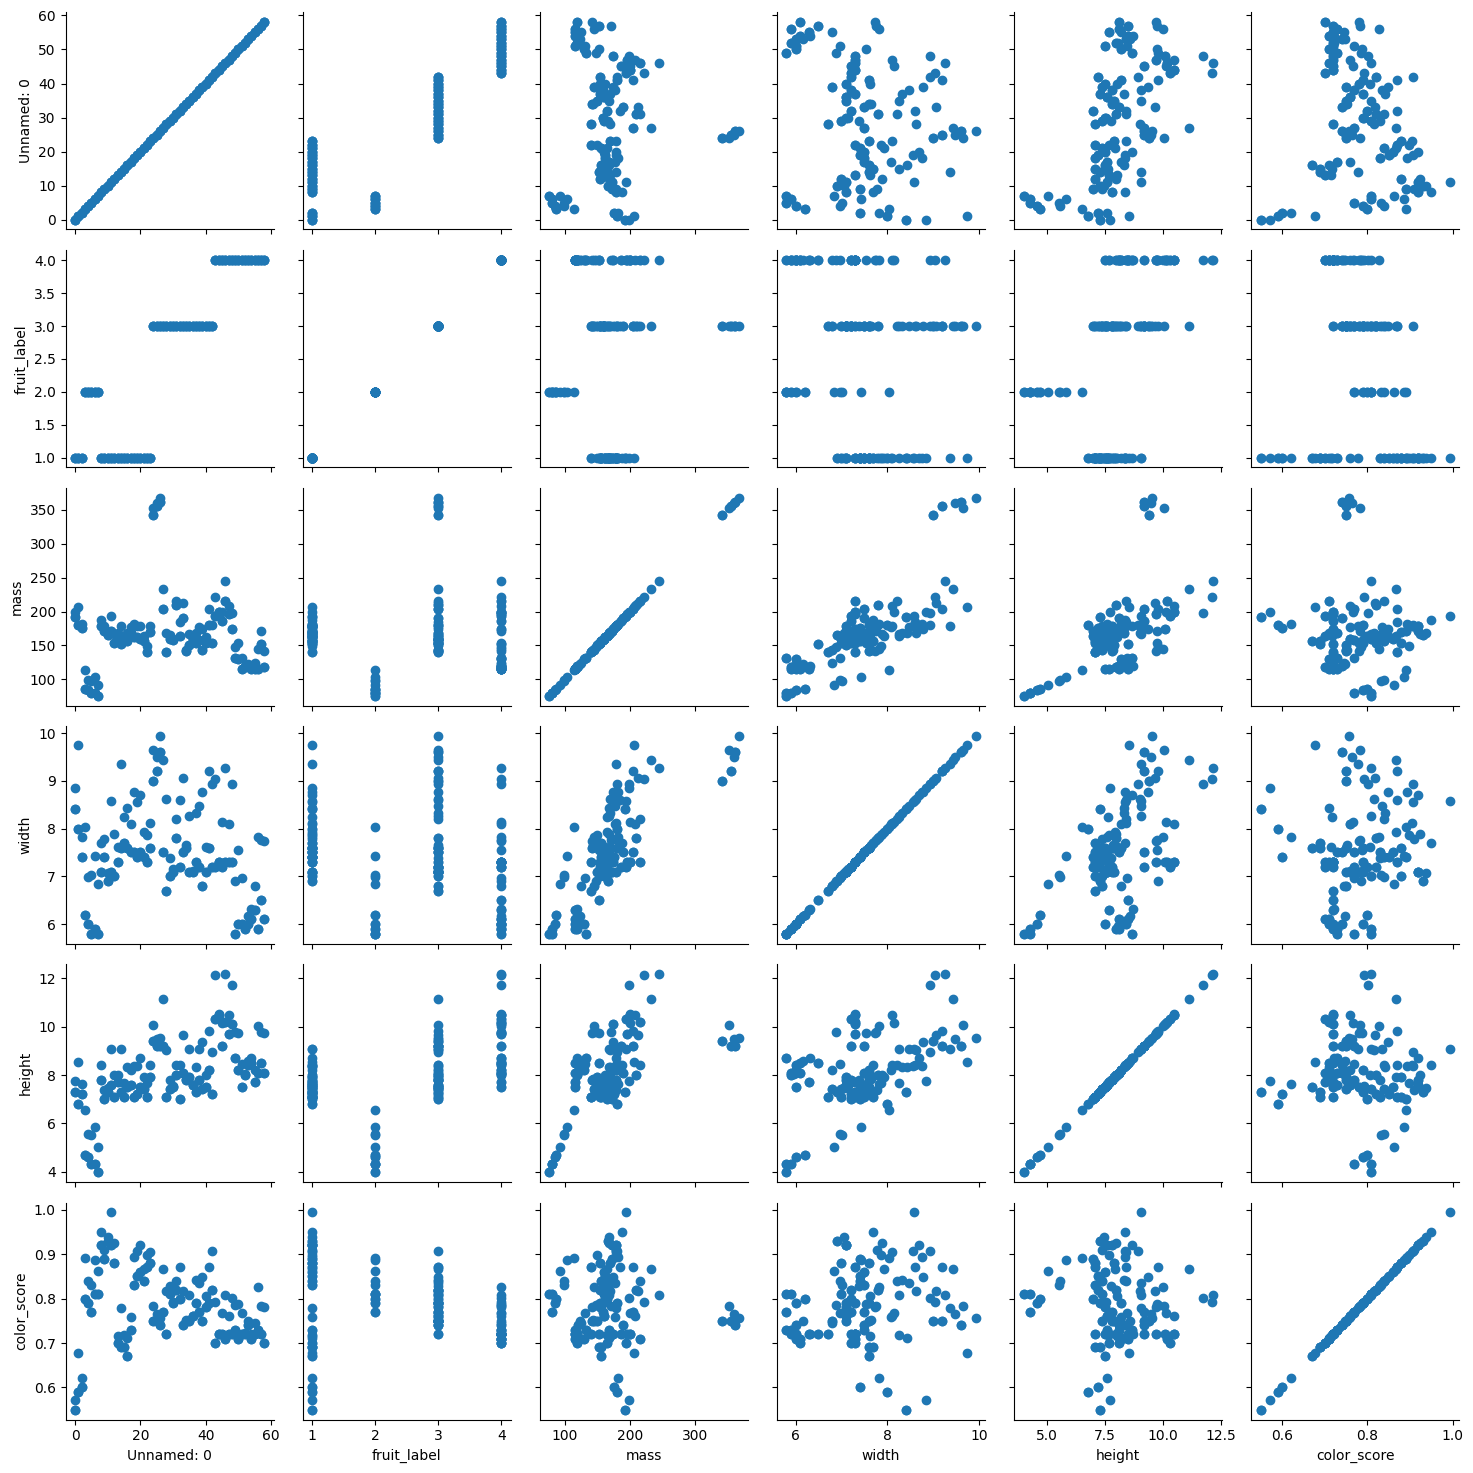

In [5]:
import seaborn as sns
grafics = sns.PairGrid(data)
grafics.map(plt.scatter);

(177, 2)


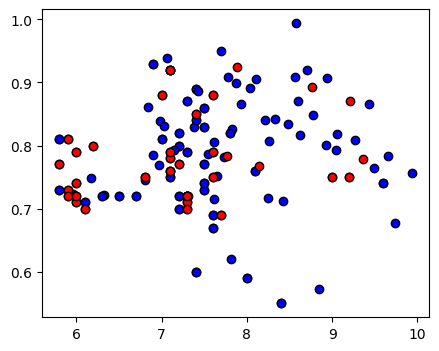

In [17]:
 # Load the fruits dataset
X = data[['width','color_score']]
y = _
X_train, X_test = train_test_split(X, test_size=0.2, random_state=3)

_,ax =plt.subplots(figsize=(5,4))
ax.scatter( X_train.iloc[:,0] , X_train.iloc[:,1], c = 'b' , edgecolors='k')
ax.scatter( X_test.iloc[:,0], X_test.iloc[:,1] , c = 'r' , edgecolors='k')
print (X.shape)


Text(0.5, 1.0, 'Silhouette')

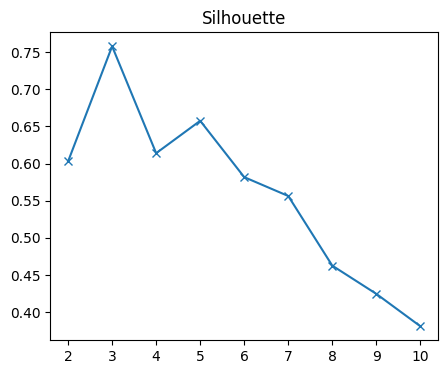

In [18]:
from sklearn.metrics import silhouette_score

# Define num of clusters
clusters = [ 2,3,4,5,6,7,8,9,10 ]
silhouette_distances = []

# Eval kmeans over each num of clusters
for k in clusters :
  kmeans = KMeans(n_clusters = k )
  kmeans.fit( X_train )

  predictions = kmeans.predict( X_test )
  distance = silhouette_score( X_test , predictions , metric="euclidean")

  silhouette_distances.append(distance)

# Plot the silhouette
_, ax = plt.subplots (figsize = (5,4))
ax.plot( clusters , silhouette_distances, marker="x")
ax.set_title("Silhouette")

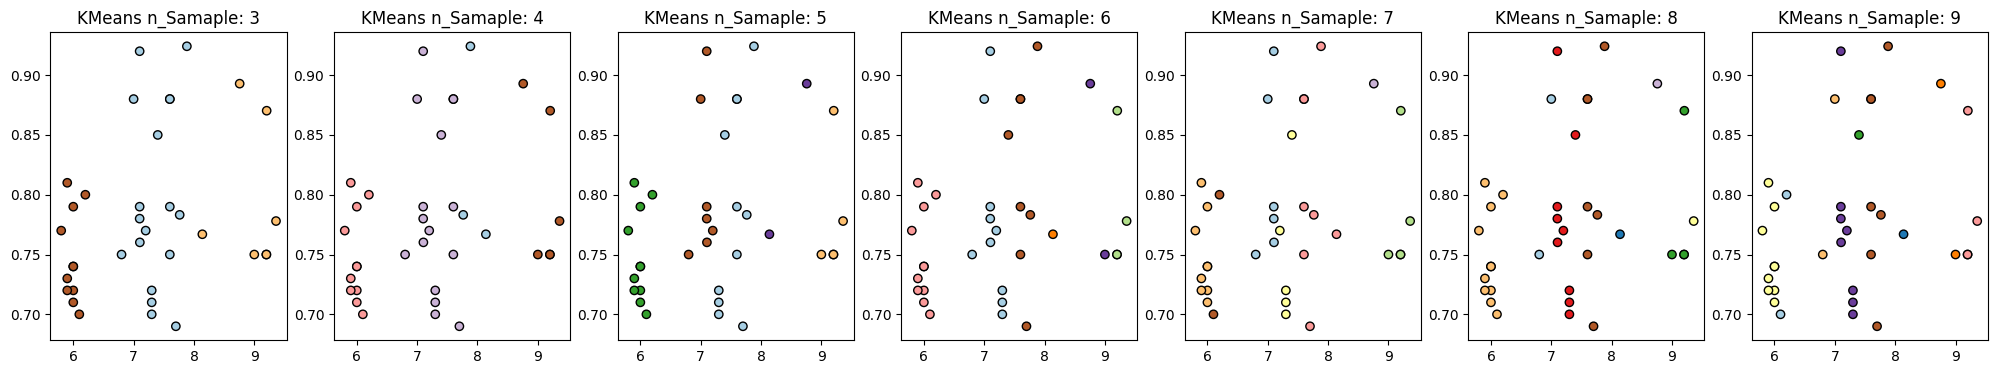

In [19]:
from sklearn.cluster import KMeans
models = [KMeans(n_clusters=3),KMeans(n_clusters=4),KMeans(n_clusters=5),KMeans(n_clusters=6),KMeans(n_clusters=7),KMeans(n_clusters=8),KMeans(n_clusters=9)]
names =['KMeans n_Samaple: 3','KMeans n_Samaple: 4', 'KMeans n_Samaple: 5', 'KMeans n_Samaple: 6', 'KMeans n_Samaple: 7', 'KMeans n_Samaple: 8', 'KMeans n_Samaple: 9']

_, axes = plt.subplots(1, 7, figsize = (25,4))
predictions = {}

# fit the model
for model, name, ax in zip(models,names,axes) :
  # Instance and train
    model.fit(X_train)
  # Predictions on train and test sets
    predictions[name] = model.predict(X_test)

  # Plot everything
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=predictions[name], edgecolors='k', cmap='Paired')
    ax.set_title(name)

## **Elbow**

In [ ]:
# def euclidean_distance(pt1, pt2):
#   assert len(pt1) == 2, "Error! No 2d point"
#   assert len(pt2) == 2, "Error! No 2d point"
#   return (pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2
# def elbow_kmeans(clusters, data):
#   #
#   # Create a function that computes the elbow for kmeans based in a list of clusters

#   return elbow_distances

In [ ]:
clusters = [ _ ]
elbow = elbow_kmeans( _ , _ )

## **Silhouette**

In [ ]:
def silhouette_kmeans(clusters, data):
  #
  # Create a function that computes the silhouette for kmeans based in a list of clusters

  return silhouette_distances

In [ ]:
clusters = [ _ ]

silhouette = silhouette_kmeans( _ , _ )

## **Comparison**

In [ ]:
_, axes = plt.subplots(1,2, figsize=(13,5))
axes[0].plot( _ , _ , marker = "x"); axes[0].set_title("Elbow")
axes[1].plot( _ , _ , marker = "x"); axes[1].set_title("Silhouette")

## **Clustering**

In [ ]:
kmeans = KMeans ( n_clusters = _ ).fit( _ )
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
predictions = kmeans.predict( _ )

In [ ]:
# Plot decision boundaries
_